# 한국인 인체 치수 데이터를 사용한 선형 회귀 모델 개발

<hr>

### 사용 데이터

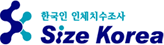

#### [제7차 한국인 인체치수조사사업](https://sizekorea.kr/page/data/1_1)의 2015년 인체 치수 데이터

- 측정 항목 : 키. 몸무게 등 총 133개 항목
- 측정 인원 : 16 ~ 69세 한국인, 남자 3,192명, 여자 3,221명, 합계 6,413명

## 분석 목표

- 몸무게(체중, weight) 예측을 위한 선형 회귀 모델(linear regression model) 개발

<hr>

목차
1. 데이터로드 
2. 독립 변수 선택
3. 선형 회귀 모델
4. 평가 지표 계산
5. 독립변수와 종속변수의 산점도

<hr>

# 메인 코드 (Python3)

### 0. 세팅

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? Y


In [2]:
!python --version # 3.8.12

Python 3.8.12


In [3]:
!pip freeze

argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bleach @ file:///tmp/build/80754af9/bleach_1628110601003/work
certifi==2021.10.8
cffi @ file:///C:/ci/cffi_1625831749120/work
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cycler==0.11.0
debugpy @ file:///C:/ci/debugpy_1629222854708/work
decorator @ file:///tmp/build/80754af9/decorator_1632776554403/work
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
entrypoints==0.3
importlib-metadata @ file:///C:/ci/importlib-metadata_1631916848487/work
ipykernel @ file:///C:/ci/ipykernel_1633545574250/work/dist/ipykernel-6.4.1-py3-none-any.whl
ipython @ file:///C:/ci/ipython_1635944310712/work
ipython-genutils @ file:///tmp/build/80754af9/ipython_genutils_1606773439826/work
jedi @ file:///C:/ci/je

In [4]:
!pip install scipy
!pip install statsmodels
!pip install sklearn
!pip install matplotlib
!pip install seaborn

In [5]:
import os
import sys
import numpy as np
import scipy as sp
from scipy.stats import norm
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

matplotlib.rcParams['figure.dpi'] = 300

for f in fm.fontManager.ttflist:
    if 'Malgun' in f.name:
        print(f'Font: {f.name}, Path: {f.fname}')
        
font_path = r"C:\Windows\Fonts\malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

Font: Malgun Gothic, Path: C:\Windows\Fonts\malgunsl.ttf
Font: Malgun Gothic, Path: C:\WINDOWS\Fonts\malgun.ttf
Font: Malgun Gothic, Path: C:\Windows\Fonts\malgun.ttf
Font: Malgun Gothic, Path: C:\Windows\Fonts\malgunbd.ttf
Font: Malgun Gothic, Path: C:\WINDOWS\Fonts\malgunbd.ttf
Font: Malgun Gothic, Path: C:\WINDOWS\Fonts\malgunsl.ttf


### 1. 데이터 로드

In [6]:
df = pd.read_csv("../../7th_korean-body_train.csv", thousands=',')

In [7]:
for i, col in enumerate(df.columns):
    print(col, df.dtypes[i])

ⓞ_02_성별 object
ⓞ_06_나이_반올림 float64
ⓞ_12_골격근량 float64
ⓞ_13_체지방량 float64
ⓞ_14_체수분 float64
ⓞ_15_단백질 float64
ⓞ_16_무기질 float64
ⓞ_17_BMI float64
ⓞ_18_체지방율 float64
ⓞ_19_복부지방율 float64
ⓞ_20_복부지방율평가 object
ⓞ_21_기초대사량 float64
ⓞ_22_기초대사량평가 object
ⓞ_23_근육조절 float64
ⓞ_24_지방조절 float64
①_001_오른쪽어깨경사각 float64
①_002_왼쪽어깨경사각 float64
①_003_키 float64
①_004_눈높이 float64
①_005_목뒤높이 float64
①_006_어깨높이 float64
①_007_어깨가쪽높이 float64
①_008_겨드랑높이 float64
①_009_굽힌팔꿈치높이 float64
①_010_허리기준선높이 float64
①_011_엉덩이높이 float64
①_012_주먹높이 float64
①_013_허리높이 float64
①_014_배꼽수준허리높이 float64
①_015_위앞엉덩뼈가시높이 float64
①_016_무릎높이 float64
①_017_샅높이 float64
①_018_가슴너비 float64
①_019_젖가슴너비 float64
①_020_허리너비 float64
①_021_배꼽수준허리너비 float64
①_022_엉덩이너비 float64
①_023_겨드랑두께 float64
①_024_가슴두께 float64
①_025_젖가슴두께 float64
①_026_허리두께 float64
①_027_배꼽수준허리두께 float64
①_028_엉덩이두께 float64
①_029_몸통수직길이 float64
①_030_엉덩이수직길이 float64
①_031_몸무게 float64
①_032_앞중심길이 float64
①_033_배꼽수준앞중심길이 float64
①_034_겨드랑앞벽사이길이 float64
①_035_겨드랑앞접힘사이길이 float64
①_036_젖꼭지

### 2. 독립 변수 선택

문제#1) 독립 변수 = ["①_090_위팔사이너비"] <br>
문제#2) 독립 변수 = ["①_090_위팔사이너비", "①_125_장딴지둘레", "①_078_앉은넙다리높이"] <br>
문제#3) 독립 변수 = ["①_090_위팔사이너비", "①_125_장딴지둘레", "①_078_앉은넙다리높이", ①_042_허리둘레", "①_045_엉덩이둘레"]

In [8]:
features = []

for i, col in enumerate(df.columns):
    if col.startswith("ⓞ_"):
        continue
    if "_여" in col:
        continue
    if not np.issubdtype(df.dtypes[i], np.number):
        continue
        
    features.append(col)

In [9]:
sdf = df[features]
corr = sdf.corr()

In [10]:
from collections import defaultdict

high_corr_pairs = defaultdict(set)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if corr.iloc[i,j] > 0.8:
            print(corr.columns[i], corr.columns[j], corr.iloc[i,j])
            col_i = corr.columns[i]
            col_j = corr.columns[j]
                            
            high_corr_pairs[col_i].add(col_j)
            high_corr_pairs[col_j].add(col_i)

①_001_오른쪽어깨경사각 ①_001_오른쪽어깨경사각 1.0
①_002_왼쪽어깨경사각 ①_002_왼쪽어깨경사각 1.0
①_003_키 ①_003_키 1.0
①_003_키 ①_004_눈높이 0.9916069040284692
①_003_키 ①_005_목뒤높이 0.9873057397521314
①_003_키 ①_006_어깨높이 0.9793079281431956
①_003_키 ①_007_어깨가쪽높이 0.9802593215246174
①_003_키 ①_008_겨드랑높이 0.976375910750072
①_003_키 ①_009_굽힌팔꿈치높이 0.9566941685624274
①_003_키 ①_010_허리기준선높이 0.9549648440447781
①_003_키 ①_011_엉덩이높이 0.912289535774246
①_003_키 ①_012_주먹높이 0.8779908705078231
①_003_키 ①_013_허리높이 0.9567071864913543
①_003_키 ①_014_배꼽수준허리높이 0.950891519369617
①_003_키 ①_015_위앞엉덩뼈가시높이 0.9299540548606825
①_003_키 ①_016_무릎높이 0.8621804963784842
①_003_키 ①_017_샅높이 0.9112609805727196
①_003_키 ①_029_몸통수직길이 0.8433766284914338
①_003_키 ①_051_목뒤오금길이 0.9325433636101839
①_003_키 ①_052_총길이 0.9759323685865956
①_003_키 ①_064_팔길이 0.8428781226780622
①_003_키 ①_065_팔안쪽길이 0.8228485254263275
①_003_키 ①_066_목뒤손목안쪽길이 0.8523127254325763
①_003_키 ①_069_다리가쪽길이 0.9543508897758374
①_003_키 ①_073_앉은키 0.9120416789546226
①_003_키 ①_074_앉은눈높이 0.8749066273026944
①_003_키 ①_075_앉은목

몸무게와 상관관계가 높은 순으로 배열

In [11]:
ser = corr["①_031_몸무게"].sort_values(ascending=False)
ser[:40]

①_031_몸무게             1.000000
①_090_위팔사이너비          0.911542
①_039_가슴둘레            0.908257
①_019_젖가슴너비           0.890329
①_070_몸통세로둘레          0.885922
①_130_위팔둘레            0.877020
①_125_장딴지둘레           0.860970
①_018_가슴너비            0.851602
①_078_앉은넙다리높이         0.851376
①_040_젖가슴둘레           0.849576
①_042_허리둘레            0.835230
①_067_겨드랑둘레           0.833572
①_045_엉덩이둘레           0.830420
①_037_목둘레             0.828485
①_071_샅앞뒤길이           0.828063
①_020_허리너비            0.825795
①_046_배돌출점기준엉덩이둘레     0.823327
①_091_팔꿈치사이너비         0.823180
①_122_넙다리중간둘레         0.821450
①_043_배꼽수준허리둘레        0.811165
①_121_넙다리둘레           0.807886
①_024_가슴두께            0.798811
①_123_무릎둘레            0.793764
①_131_팔꿈치둘레           0.790382
①_124_무릎아래둘레          0.788665
①_026_허리두께            0.784401
①_034_겨드랑앞벽사이길이       0.782374
①_132_손목둘레            0.775223
①_035_겨드랑앞접힘사이길이      0.773670
①_023_겨드랑두께           0.769183
①_126_종아리최소둘레         0.768220
①_057_겨드랑뒤벽접힘사이길이     0.762758
①_021_배꼽

In [12]:
features_selected = set()
features_redundant = set()

for col, var in ser.iteritems():
    if col == "①_031_몸무게":
        continue
        
    if col in features_redundant:
        continue
        
    if col not in features_selected:
        features_selected.add(col)
        features_redundant |= high_corr_pairs[col]

독립 변수간 공선성(Multicollinearity) 제거 후 몸무게와 상관관계가 높은 순으로 배열

In [13]:
ser[features_selected].sort_values(ascending=False)[:20]

①_090_위팔사이너비          0.911542
①_125_장딴지둘레           0.860970
①_078_앉은넙다리높이         0.851376
①_042_허리둘레            0.835230
①_045_엉덩이둘레           0.830420
①_071_샅앞뒤길이           0.828063
①_131_팔꿈치둘레           0.790382
①_132_손목둘레            0.775223
①_035_겨드랑앞접힘사이길이      0.773670
①_023_겨드랑두께           0.769183
①_059_목뒤젖꼭지허리둘레선길이    0.753243
①_058_목뒤젖꼭지길이         0.728430
①_029_몸통수직길이          0.725249
①_038_목밑둘레            0.716390
①_028_엉덩이두께           0.703232
①_050_배꼽수준등길이         0.692325
①_055_어깨가쪽사이길이        0.685142
①_081_앉은엉덩이무릎수평길이     0.669869
①_066_목뒤손목안쪽길이        0.653673
①_129_발뒤꿈치너비          0.649380
Name: ①_031_몸무게, dtype: float64

#### 독립 변수 선택 이유

공선성 필터를 거쳐 몸무게와 상관관계가 높은 순으로 특징 5개를 선택하였습니다<br>
해당 특징이 순서대로 각 문제에 독립변수로 사용됩니다

①_090_위팔사이너비<br>
①_125_장딴지둘레<br>
①_078_앉은넙다리높이<br>
①_042_허리둘레 <br>
①_045_엉덩이둘레<br>

In [14]:
features1 = ["①_031_몸무게", "①_090_위팔사이너비"]

features2 = features1.copy()
features2.extend(["①_125_장딴지둘레", "①_078_앉은넙다리높이"])

features3 = features2.copy()
features3.extend(["①_042_허리둘레", "①_045_엉덩이둘레"])

sdf1 = df[features1].copy()
sdf2 = df[features2].copy()
sdf3 = df[features3].copy()

print(features1)
print(features2)
print(features3)

['①_031_몸무게', '①_090_위팔사이너비']
['①_031_몸무게', '①_090_위팔사이너비', '①_125_장딴지둘레', '①_078_앉은넙다리높이']
['①_031_몸무게', '①_090_위팔사이너비', '①_125_장딴지둘레', '①_078_앉은넙다리높이', '①_042_허리둘레', '①_045_엉덩이둘레']


종속변수(몸무게)와 독립변수의 피어슨 상관관계

In [15]:
ser[features_selected].sort_values(ascending=False)[:5]

①_090_위팔사이너비     0.911542
①_125_장딴지둘레      0.860970
①_078_앉은넙다리높이    0.851376
①_042_허리둘레       0.835230
①_045_엉덩이둘레      0.830420
Name: ①_031_몸무게, dtype: float64

In [16]:
sdf1.dropna(inplace=True)
sdf2.dropna(inplace=True)
sdf3.dropna(inplace=True)

In [17]:
data1 = sdf1.to_numpy()
train_y_1 = data1[:, 0]
train_X_1 = data1[:, 1:]

data2 = sdf2.to_numpy()
train_y_2 = data2[:, 0]
train_X_2 = data2[:, 1:]

data3 = sdf3.to_numpy()
train_y_3 = data3[:, 0]
train_X_3 = data3[:, 1:]

### 3. 선형 회귀 모델

In [18]:
model = LinearRegression()
reg1 = model.fit(train_X_1, train_y_1)
bhat1 = np.zeros(len(features1))
bhat1[0] = reg1.intercept_
bhat1[1:] = reg1.coef_

model = LinearRegression()
reg2 = model.fit(train_X_2, train_y_2)
bhat2 = np.zeros(len(features2))
bhat2[0] = reg2.intercept_
bhat2[1:] = reg2.coef_

model = LinearRegression()
reg3 = model.fit(train_X_3, train_y_3)
bhat3 = np.zeros(len(features3))
bhat3[0] = reg3.intercept_
bhat3[1:] = reg3.coef_


회귀 계수(Regression Coefficient)

변수가 1개인 경우 회귀 계수(문제 1) / beta_0, beta_1 순 <br>
변수가 3개인 경우 회귀 계수(문제 2) / beta_0, beta_1, beta_2, beta_3 순 <br>
변수가 5개인 경우 회귀 계수(문제 3) / beta_0, beta_1, beta_2, beta_3, beta_4, beta_5 순 

In [19]:
print(bhat1, end='\n\n')
print(bhat2, end='\n\n')
print(bhat3)

[-70.05208072   0.30543816]

[-79.55801415   0.17713632   0.12346398   0.14868915]

[-8.64710256e+01  1.31017384e-01  9.04301165e-02  9.17168518e-02
  2.63240698e-02  2.81656539e-02]


### 4. 평가 지표 (evaluation metrics) 계산

In [20]:
yhat = reg1.predict(train_X_1)
rss = np.sum((yhat - train_y_1) ** 2)
rmse = np.sqrt(np.mean(((yhat - train_y_1) ** 2)))

print("\n문제1")
print("RSS :", rss)
print("RMSE :", rmse)



yhat = reg2.predict(train_X_2)
rss = np.sum((yhat - train_y_2) ** 2)
rmse = np.sqrt(np.mean(((yhat - train_y_2) ** 2)))

print("\n문제2")
print("RSS :", rss)
print("RMSE :", rmse)



yhat = reg3.predict(train_X_3)
rss = np.sum((yhat - train_y_3) ** 2)
rmse = np.sqrt(np.mean(((yhat - train_y_3) ** 2)))

print("\n문제3")
print("RSS :", rss)
print("RMSE :", rmse)


문제1
RSS : 83716.22675727124
RMSE : 5.110025458478456

문제2
RSS : 46697.66647407502
RMSE : 3.817100306528689

문제3
RSS : 29460.99626490051
RMSE : 3.032336969798772


모델 평가

Note

R-squared 가 1에 가까울수록 좋은 모델<br>
F-statistic이 높을수록 좋음 + P-value가 낮을수록 좋음

In [21]:
sm_train_y_1 = data1[:, 0]
sm_train_X_1 = sm.add_constant(data1[:, 1:])

model = sm.OLS(train_y_1, train_X_1)
res = model.fit()

res.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.180e+05
Date:                Fri, 05 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:32:13   Log-Likelihood:                         -11140.
No. Observations:                3206   AIC:                                  2.228e+04
Df Residuals:                    3205   BIC:                                  2.229e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1466      0.000    466.907      0.000       0.146       0.147
==============================================================================
Omnibus:                      502.900   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.570
Skew:                           1.014   Prob(JB):                    2.03e-190
Kurtosis:                       4.558   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
sm_train_y_2 = data2[:, 0]
sm_train_X_2 = sm.add_constant(data2[:, 1:])

model = sm.OLS(train_y_2, train_X_2)
res = model.fit()

res.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          8.326e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:32:13   Log-Likelihood:                         -10920.
No. Observations:                3205   AIC:                                  2.185e+04
Df Residuals:                    3202   BIC:                                  2.186e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0556      0.006      9.994      0.000       0.045       0.067
x2            -0.0091      0.007     -1.334      0.182      -0.022       0.004
x3             0.3052      0.015     19.730      0.000       0.275       0.336
==============================================================================
Omnibus:                      445.371   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.664
Skew:                           0.951   Prob(JB):                    6.50e-156
Kurtosis:                       4.316   Cond. No.                         72.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
sm_train_y_3 = data3[:, 0]
sm_train_X_3 = sm.add_constant(data3[:, 1:])

model = sm.OLS(train_y_3, train_X_3)
res = model.fit()

res.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          8.599e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:32:13   Log-Likelihood:                         -10054.
No. Observations:                3204   AIC:                                  2.012e+04
Df Residuals:                    3199   BIC:                                  2.015e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0254      0.005      5.215      0.000       0.016       0.035
x2             0.0929      0.006     15.277      0.000       0.081       0.105
x3             0.3047      0.012     25.476      0.000       0.281       0.328
x4             0.0622      0.002     39.709      0.000       0.059       0.065
x5            -0.0773      0.002    -35.249      0.000      -0.082      -0.073
==============================================================================
Omnibus:                      239.818   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.267
Skew:                           0.575   Prob(JB):                     3.61e-84
Kurtosis:                       4.246   Cond. No.                         169.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. 독립변수와 종속변수의 산점도

In [24]:
sdf[features3[0]]

0       65.9
1       55.9
2       46.1
3       59.2
4       58.0
        ... 
3205    75.7
3206    69.9
3207    49.5
3208    49.3
3209    59.9
Name: ①_031_몸무게, Length: 3210, dtype: float64

독립 변수 1 : ①_090_위팔사이너비


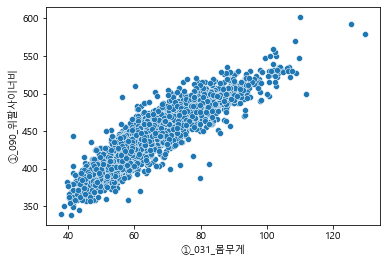

In [25]:
ax=sns.scatterplot(x=sdf[features3[0]], y=sdf[features3[1]])
print("독립 변수 1 :", features3[1])

독립 변수 2 : ①_125_장딴지둘레


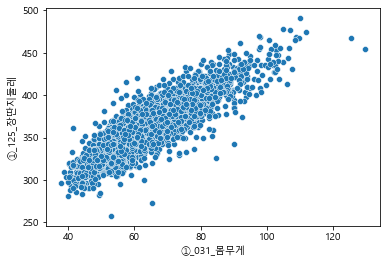

In [26]:
ax=sns.scatterplot(x=sdf[features3[0]], y=sdf[features3[2]])
print("독립 변수 2 :", features3[2])

독립 변수 3 : ①_078_앉은넙다리높이


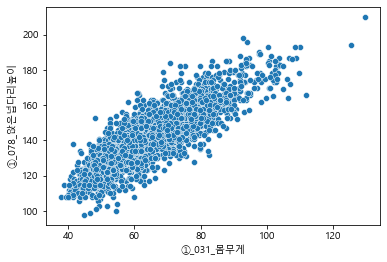

In [27]:
ax=sns.scatterplot(x=sdf[features3[0]], y=sdf[features3[3]])
print("독립 변수 3 :", features3[3])

독립 변수 4 : ①_042_허리둘레


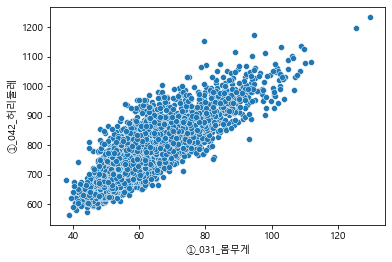

In [28]:
ax=sns.scatterplot(x=sdf[features3[0]], y=sdf[features3[4]])
print("독립 변수 4 :", features3[4])

독립 변수 5 : ①_045_엉덩이둘레


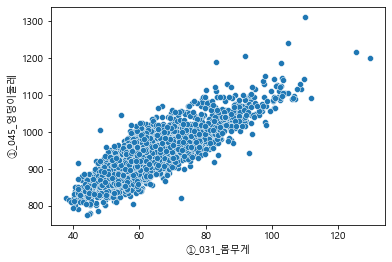

In [29]:
ax=sns.scatterplot(x=sdf[features3[0]], y=sdf[features3[5]])
print("독립 변수 5 :", features3[5])